In [53]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import matplotlib.pyplot as plt





In [71]:
# ========================================================
# Question 1: Use yfinance to Extract Tesla Stock Data
# ========================================================

TSLA = yf.Ticker("TSLA")
tsla_data = TSLA.history(period="max")

tsla_data.reset_index(inplace=True)
tsla_data.head() 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
# ========================================================
# Question 2: Use Webscraping to Extract TESLA Revenue Data
# ========================================================

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme).text
soup_tsla = BeautifulSoup(html_gme, "html.parser")

Gamestop_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])



for row in soup_tsla("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    tesla_data = pd.concat([tesla_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

print(tesla_data.tail())


        Open    High     Low   Close       Volume  Dividends  Stock Splits  \
3842  109.00  122.18   90.11   91.84  488,193,200        NaN           NaN   
3843  124.47  133.27  113.85  114.38  319,939,200        NaN           NaN   
3844  109.20  126.60  101.86  123.33  320,321,800        NaN           NaN   
3845  102.91  115.83   96.26  108.38  446,204,400        NaN           NaN   
3846  109.35  111.24   93.55  103.26  497,401,200        NaN           NaN   

              Date Adj Close  
3842  Jan 01, 2016     91.84  
3843  Dec 01, 2015    114.38  
3844  Nov 01, 2015    123.33  
3845  Oct 01, 2015    108.38  
3846  Sep 01, 2015    103.26  


In [36]:
# ========================================================
# Question 3: Use yfinance to Extract GameStop Stock Data
# ========================================================

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head() 


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [ ]:
# ========================================================
# Question 4: Use Webscraping to Extract GME Revenue Data
# ========================================================

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_gme, "html.parser")


Gamestop_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])



for row in soup_gme.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    Gamestop_data = pd.concat([Gamestop_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

print(Gamestop_data.tail())


            Date    Open    High     Low   Close       Volume Adj Close
65  Jan 01, 2016  109.00  122.18   90.11   91.84  488,193,200     91.84
66  Dec 01, 2015  124.47  133.27  113.85  114.38  319,939,200    114.38
67  Nov 01, 2015  109.20  126.60  101.86  123.33  320,321,800    123.33
68  Oct 01, 2015  102.91  115.83   96.26  108.38  446,204,400    108.38
69  Sep 01, 2015  109.35  111.24   93.55  103.26  497,401,200    103.26


In [ ]:
#Define a function to make a graph of stock data

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

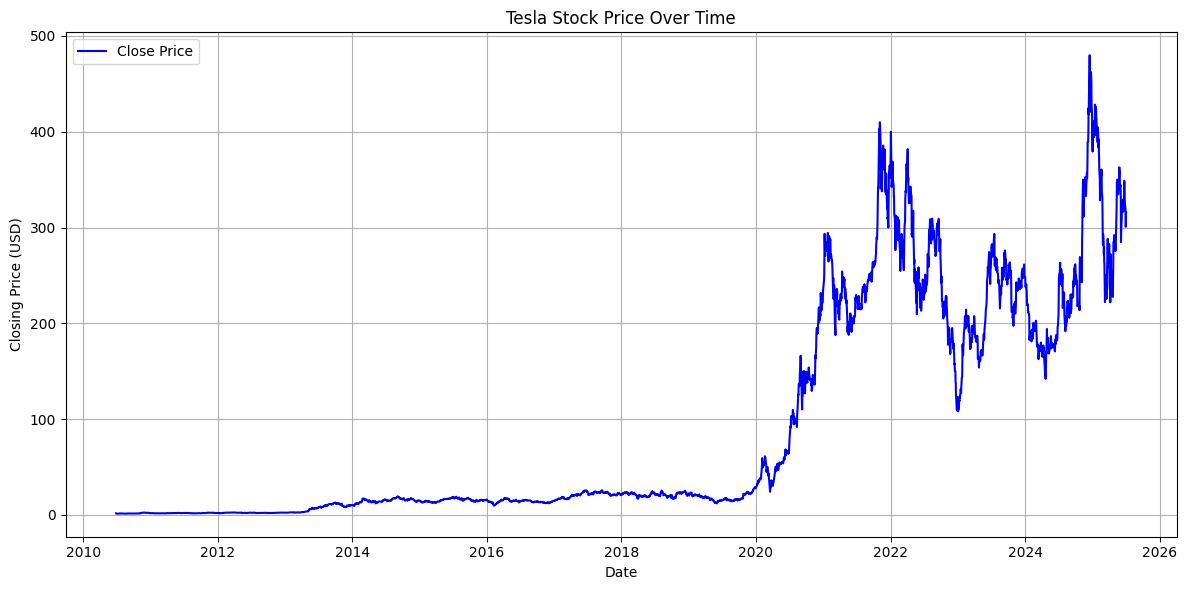

In [ ]:
# ========================================================
# Question 5: Plot Tesla Stock Graph using Plotly
# ========================================================
make_graph(tsla_data, "Tesla Stock Price Over Time")  


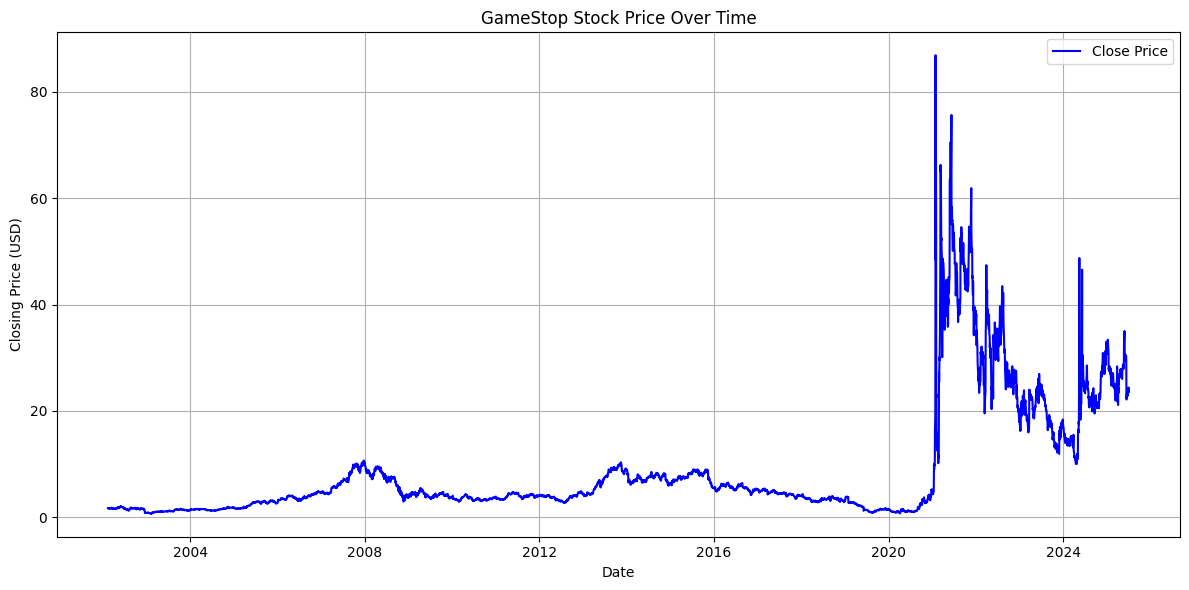

In [ ]:
# ========================================================
# Question 6: Plot GameStop Stock Graph using Plotly
# ========================================================
make_graph(gme_data, "GameStop Stock Price Over Time")  
